<a href="https://colab.research.google.com/github/RodrigoGuedesDP/Estructuras-de-Datos-y-Algoritmos/blob/main/Graphs/QuadTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

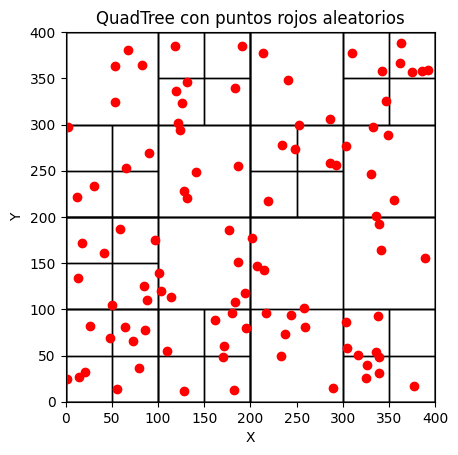

In [1]:
#
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Clase para representar un punto
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

# Clase para representar un rectángulo (la región de cada nodo)
class Rectangle:
    def __init__(self, x, y, w, h):
        # Centro (x, y), ancho w y alto h
        self.x = x
        self.y = y
        self.w = w
        self.h = h

    def contains(self, point):
        """Determina si el punto está dentro del rectángulo."""
        return (point.x >= self.x - self.w/2 and
                point.x <= self.x + self.w/2 and
                point.y >= self.y - self.h/2 and
                point.y <= self.y + self.h/2)

    def intersects(self, range):
        """Determina si este rectángulo intersecta a otro (no se usa en este ejemplo, pero es útil en consultas)."""
        return not (range.x - range.w/2 > self.x + self.w/2 or
                    range.x + range.w/2 < self.x - self.w/2 or
                    range.y - range.h/2 > self.y + self.h/2 or
                    range.y + range.h/2 < self.y - self.h/2)

# Clase QuadTree
class QuadTree:
    def __init__(self, boundary, capacity):
        self.boundary = boundary      # Región representada por este nodo (un Rectangle)
        self.capacity = capacity      # Número máximo de puntos antes de subdividir
        self.points = []              # Puntos contenidos en este nodo
        self.divided = False          # Indica si el nodo ya se subdividió

    def subdivide(self):
        """Subdivide el nodo en cuatro cuartos (nodos hijos)."""
        x = self.boundary.x
        y = self.boundary.y
        w = self.boundary.w / 2
        h = self.boundary.h / 2

        # Se definen los cuatro rectángulos (nodos hijos)
        ne = Rectangle(x + w/2, y - h/2, w, h)
        nw = Rectangle(x - w/2, y - h/2, w, h)
        se = Rectangle(x + w/2, y + h/2, w, h)
        sw = Rectangle(x - w/2, y + h/2, w, h)

        self.northeast = QuadTree(ne, self.capacity)
        self.northwest = QuadTree(nw, self.capacity)
        self.southeast = QuadTree(se, self.capacity)
        self.southwest = QuadTree(sw, self.capacity)
        self.divided = True

    def insert(self, point):
        """Inserta un punto en el QuadTree."""
        if not self.boundary.contains(point):
            return False

        if len(self.points) < self.capacity:
            self.points.append(point)
            return True
        else:
            if not self.divided:
                self.subdivide()

            if self.northeast.insert(point):
                return True
            elif self.northwest.insert(point):
                return True
            elif self.southeast.insert(point):
                return True
            elif self.southwest.insert(point):
                return True

        return False

def draw_quadtree(qt, ax):
    """Dibuja las fronteras del QuadTree de forma recursiva."""
    rect = qt.boundary
    # Dibujar el rectángulo del nodo actual
    patch = patches.Rectangle((rect.x - rect.w/2, rect.y - rect.h/2), rect.w, rect.h,
                              edgecolor='black', facecolor='none', lw=1)
    ax.add_patch(patch)

    if qt.divided:
        draw_quadtree(qt.northeast, ax)
        draw_quadtree(qt.northwest, ax)
        draw_quadtree(qt.southeast, ax)
        draw_quadtree(qt.southwest, ax)

# Código principal
if __name__ == "__main__":
    # Definir la región del QuadTree: centro (200,200), ancho 400, alto 400
    boundary = Rectangle(200, 200, 400, 400)
    qt = QuadTree(boundary, capacity=4)  # Capacidad de 4 puntos por nodo

    # Generar puntos rojos aleatorios dentro del área [0,400]x[0,400]
    num_points = 100
    points = []
    for _ in range(num_points):
        x = random.uniform(0, 400)
        y = random.uniform(0, 400)
        p = Point(x, y)
        points.append(p)
        qt.insert(p)

    # Visualización con matplotlib
    fig, ax = plt.subplots()
    draw_quadtree(qt, ax)
    xs = [p.x for p in points]
    ys = [p.y for p in points]
    ax.scatter(xs, ys, color='red')
    ax.set_xlim(0, 400)
    ax.set_ylim(0, 400)
    ax.set_aspect('equal', 'box')
    plt.title("QuadTree con puntos rojos aleatorios")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()


Regiones ordenadas de mayor a menor cantidad de puntos:
1: Centro=(350.0, 150.0), Tamaño=(100.0x100.0), Puntos=4
2: Centro=(50.0, 50.0), Tamaño=(100.0x100.0), Puntos=4
3: Centro=(50.0, 250.0), Tamaño=(100.0x100.0), Puntos=4
4: Centro=(250.0, 150.0), Tamaño=(100.0x100.0), Puntos=3
5: Centro=(275.0, 75.0), Tamaño=(50.0x50.0), Puntos=2
6: Centro=(175.0, 25.0), Tamaño=(50.0x50.0), Puntos=2
7: Centro=(175.0, 125.0), Tamaño=(50.0x50.0), Puntos=2
8: Centro=(175.0, 175.0), Tamaño=(50.0x50.0), Puntos=2
9: Centro=(250.0, 250.0), Tamaño=(100.0x100.0), Puntos=2
10: Centro=(325.0, 25.0), Tamaño=(50.0x50.0), Puntos=1
11: Centro=(275.0, 25.0), Tamaño=(50.0x50.0), Puntos=1
12: Centro=(225.0, 75.0), Tamaño=(50.0x50.0), Puntos=1
13: Centro=(125.0, 25.0), Tamaño=(50.0x50.0), Puntos=1
14: Centro=(125.0, 75.0), Tamaño=(50.0x50.0), Puntos=1
15: Centro=(125.0, 175.0), Tamaño=(50.0x50.0), Puntos=1
16: Centro=(75.0, 125.0), Tamaño=(50.0x50.0), Puntos=1
17: Centro=(375.0, 225.0), Tamaño=(50.0x50.0), Puntos=1
18

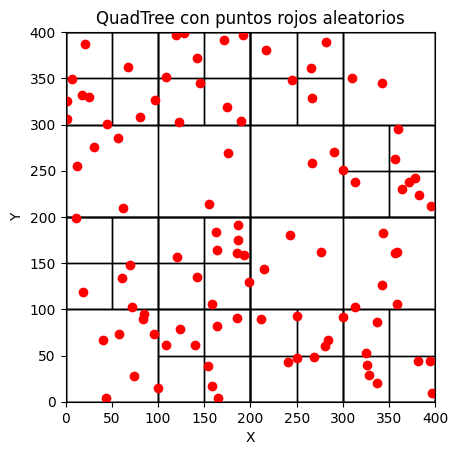

In [2]:
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Clase para representar un punto
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

# Clase para representar un rectángulo (la región de cada nodo)
class Rectangle:
    def __init__(self, x, y, w, h):
        # Centro (x, y), ancho w y alto h
        self.x = x
        self.y = y
        self.w = w
        self.h = h

    def contains(self, point):
        """Determina si el punto está dentro del rectángulo."""
        return (point.x >= self.x - self.w/2 and
                point.x <= self.x + self.w/2 and
                point.y >= self.y - self.h/2 and
                point.y <= self.y + self.h/2)

    def intersects(self, range):
        """Determina si este rectángulo intersecta a otro."""
        return not (range.x - range.w/2 > self.x + self.w/2 or
                    range.x + range.w/2 < self.x - self.w/2 or
                    range.y - range.h/2 > self.y + self.h/2 or
                    range.y + range.h/2 < self.y - self.h/2)

# Clase QuadTree
class QuadTree:
    def __init__(self, boundary, capacity):
        self.boundary = boundary      # Región representada por este nodo (un Rectangle)
        self.capacity = capacity      # Número máximo de puntos antes de subdividir
        self.points = []              # Puntos contenidos en este nodo
        self.divided = False          # Indica si el nodo ya se subdividió

    def subdivide(self):
        """Subdivide el nodo en cuatro cuartos (nodos hijos)."""
        x = self.boundary.x
        y = self.boundary.y
        w = self.boundary.w / 2
        h = self.boundary.h / 2

        # Se definen los cuatro rectángulos (nodos hijos)
        ne = Rectangle(x + w/2, y - h/2, w, h)
        nw = Rectangle(x - w/2, y - h/2, w, h)
        se = Rectangle(x + w/2, y + h/2, w, h)
        sw = Rectangle(x - w/2, y + h/2, w, h)

        self.northeast = QuadTree(ne, self.capacity)
        self.northwest = QuadTree(nw, self.capacity)
        self.southeast = QuadTree(se, self.capacity)
        self.southwest = QuadTree(sw, self.capacity)
        self.divided = True

    def insert(self, point):
        """Inserta un punto en el QuadTree."""
        if not self.boundary.contains(point):
            return False

        if len(self.points) < self.capacity:
            self.points.append(point)
            return True
        else:
            if not self.divided:
                self.subdivide()
            if self.northeast.insert(point):
                return True
            elif self.northwest.insert(point):
                return True
            elif self.southeast.insert(point):
                return True
            elif self.southwest.insert(point):
                return True

        return False

def draw_quadtree(qt, ax):
    """Dibuja las fronteras del QuadTree de forma recursiva."""
    rect = qt.boundary
    # Dibujar el rectángulo del nodo actual
    patch = patches.Rectangle((rect.x - rect.w/2, rect.y - rect.h/2), rect.w, rect.h,
                              edgecolor='black', facecolor='none', lw=1)
    ax.add_patch(patch)

    if qt.divided:
        draw_quadtree(qt.northeast, ax)
        draw_quadtree(qt.northwest, ax)
        draw_quadtree(qt.southeast, ax)
        draw_quadtree(qt.southwest, ax)

def get_leaf_nodes(qt):
    """Recorre el QuadTree y devuelve una lista de nodos hoja (sin subdividir)."""
    leaves = []
    if not qt.divided:
        leaves.append(qt)
    else:
        leaves.extend(get_leaf_nodes(qt.northeast))
        leaves.extend(get_leaf_nodes(qt.northwest))
        leaves.extend(get_leaf_nodes(qt.southeast))
        leaves.extend(get_leaf_nodes(qt.southwest))
    return leaves

def regions_with_most_points(qt):
    """
    Devuelve una lista de tuplas (boundary, count) de cada región (nodo hoja)
    ordenadas de mayor a menor según la cantidad de puntos que contienen.
    """
    leaves = get_leaf_nodes(qt)
    # Ordenamos los nodos hoja por la cantidad de puntos (de mayor a menor)
    sorted_leaves = sorted(leaves, key=lambda node: len(node.points), reverse=True)
    # Devolvemos (boundary, count)
    return [(node.boundary, len(node.points)) for node in sorted_leaves]

# Código principal
if __name__ == "__main__":
    # Definir la región del QuadTree: centro (200,200), ancho 400, alto 400
    boundary = Rectangle(200, 200, 400, 400)
    qt = QuadTree(boundary, capacity=4)  # Capacidad de 4 puntos por nodo

    # Generar puntos rojos aleatorios dentro del área [0,400]x[0,400]
    num_points = 100
    points = []
    for _ in range(num_points):
        x = random.uniform(0, 400)
        y = random.uniform(0, 400)
        p = Point(x, y)
        points.append(p)
        qt.insert(p)

    # Obtener las regiones con mayor cantidad de puntos
    regions = regions_with_most_points(qt)
    print("Regiones ordenadas de mayor a menor cantidad de puntos:")
    for i, (rect, count) in enumerate(regions):
        print(f"{i+1}: Centro=({rect.x:.1f}, {rect.y:.1f}), Tamaño=({rect.w:.1f}x{rect.h:.1f}), Puntos={count}")

    # Visualización con matplotlib
    fig, ax = plt.subplots()
    draw_quadtree(qt, ax)
    xs = [p.x for p in points]
    ys = [p.y for p in points]
    ax.scatter(xs, ys, color='red')
    ax.set_xlim(0, 400)
    ax.set_ylim(0, 400)
    ax.set_aspect('equal', 'box')
    plt.title("QuadTree con puntos rojos aleatorios")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()
